# Sentiment classification using nltk.sentiment.vader

## Google play review classification

In [1]:
import pandas as pd

from itertools import count
from nltk.util import pr

In [3]:
data = pd.read_csv("Google_user_reviews.csv")
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
print(data.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [5]:
# dropping null values

data = data.dropna()
print(data.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [ ]:
# add three new columns in the dataset - Positive, Negative, and Neutral

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhaval_patel\AppData\Roaming\nltk_data...


True

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Translated_Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Translated_Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Translated_Review"]]

In [10]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Positive,Negative,Neutral
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.534,0.0,0.466
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.519,0.0,0.481
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.451,0.0,0.549
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.677,0.0,0.323
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.808,0.0,0.192


In [13]:
data = data[data['App'] =='Angry Birds Classic']

C:\Users\dhaval_patel\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


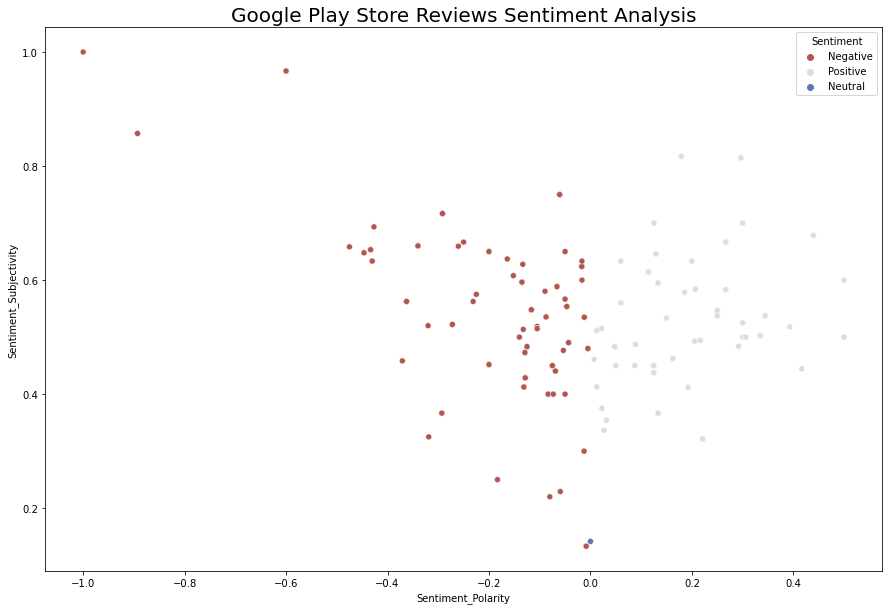

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.scatterplot(data['Sentiment_Polarity'], data['Sentiment_Subjectivity'], 
                hue = data['Sentiment'], edgecolor='white', palette="twilight_shifted_r")

plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

## Hotel reviews classification

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
data = pd.read_csv("tripadvisor_hotel_reviews_mini.csv")
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [30]:
# Quick visualization of the data

# Get total count for each reviews
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

print(ratings)

5    4278
4    3066
3    1112
2     909
1     755
Name: Rating, dtype: int64


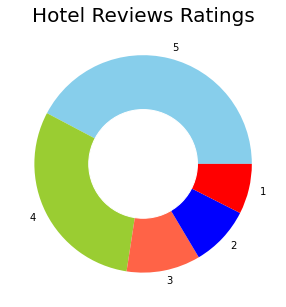

In [22]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]

plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')

fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)

plt.show()

In [24]:
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]

In [26]:
data.head()

,Review,Rating,Positive,Negative,Neutral
0,nice hotel expensive parking got good deal sta...,4,0.285,0.072,0.643
1,ok nothing special charge diamond member hilto...,2,0.189,0.110,0.701
2,nice rooms not 4* experience hotel monaco seat...,3,0.219,0.081,0.700
3,"unique, great stay, wonderful time hotel monac...",5,0.385,0.060,0.555
4,"great stay great stay, went seahawk game aweso...",5,0.221,0.135,0.643


In [27]:
# let’s take a look at how most people think about hotel services based on the sentiment of their reviews


def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")

In [28]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

sentiment_score(x, y, z)

Neutral 🙂 


In [29]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  3132.507
Negative:  747.7020000000034
Neutral:  6239.771999999993


In [35]:
# out of ~10k reviews, only 0.75 reviews are negative and ~6.2k reviews neutral, so we can say that 
# customar are overall neutral for this hotel (more towards positive than negative)

data

,Review,Rating,Positive,Negative,Neutral
0,nice hotel expensive parking got good deal sta...,4,0.285,0.072,0.643
1,ok nothing special charge diamond member hilto...,2,0.189,0.110,0.701
2,nice rooms not 4* experience hotel monaco seat...,3,0.219,0.081,0.700
3,"unique, great stay, wonderful time hotel monac...",5,0.385,0.060,0.555
4,"great stay great stay, went seahawk game aweso...",5,0.221,0.135,0.643
...,...,...,...,...,...
10115,good glitches nice room great location great s...,3,0.246,0.000,0.754
10116,great trendy location fantastic zero hotel loc...,5,0.333,0.035,0.632
10117,fantastic location fantastic room family staye...,5,0.485,0.060,0.455
10118,"great getaway, nice small boutique hotel cater...",4,0.505,0.000,0.495


## This is how the sentiment analysis works here

In [41]:
sentiments.polarity_scores('I am super happy with this service.')

{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.8225}

In [42]:
sentiments.polarity_scores('I am super happy with this service. Though I wish there were some additional freebies, it is okay overall.')

{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.9325}

In [44]:
sentiments.polarity_scores('I am not fine with this service. I really wish there were some additional freebies. That would have made me happier.')

{'neg': 0.062, 'neu': 0.582, 'pos': 0.357, 'compound': 0.8225}